<a href="https://colab.research.google.com/github/AhmedAnasHaouari/project_2/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **Project 2 (Part 2)** :

- Haouari Ahmed Anas

- 24/12/2023

# Imports :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, classification_report, \
ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

# Loading Data :

In [3]:
file = '/content/drive/MyDrive/datasets/adult.csv'
df = pd.read_csv(file)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df1 = df.copy()

In [5]:
df.shape

(48842, 15)

- Cleaning data :

In [6]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.duplicated().sum()

52

In [8]:
df.drop_duplicates(inplace = True)

- Exploring data :

In [9]:
df.describe().round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.00,48790.00,48790.00,48790.00,48790.00,48790.00
mean,38.65,189669.00,10.08,1080.22,87.60,40.43
std,13.71,105617.23,2.57,7455.91,403.21,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117555.00,9.00,0.00,0.00,40.00
50%,37.00,178138.50,10.00,0.00,0.00,40.00
75%,48.00,237606.25,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [11]:
df.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [12]:
df.isin([0]).sum()

age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain       44755
capital-loss       46508
hours-per-week         0
native-country         0
income                 0
dtype: int64

In [13]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)

In [14]:
for column in df.columns :
  if df[column].dtypes == 'object' :
    n = df[column].nunique()
    print(f'{df[column].value_counts()}\n')
    if n > 9 :
      print(f'There are {n} unique values for {column}. This is a feature with a high cardinality.\n')

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

There are 16 unique values for education. This is a feature with a high cardinality.

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       6165
Craft-repair 

- This dataset is unbalanced with a rate of salaries <=50K 3 times higher than salaries >50K.

In [15]:
df['educational-num'].value_counts()

9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64

- Value counts of the educational_num are the same then those of education. They represente the same variable and one of them can be dropped.

In [16]:
df.drop(columns = 'educational-num', inplace = True)

- Native-country is a feature with a high cardinality. It could be better to drop it.

In [17]:
df.drop(columns = 'native-country', inplace = True)

- Both capital-gain and capital-loss columns have almost 90% data as 0. We can drop them.   

In [18]:
df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)

In [19]:
df.shape

(48790, 11)

In [20]:
df.dropna(how='any',inplace=True)

# Data visualization :

<Axes: xlabel='gender', ylabel='count'>

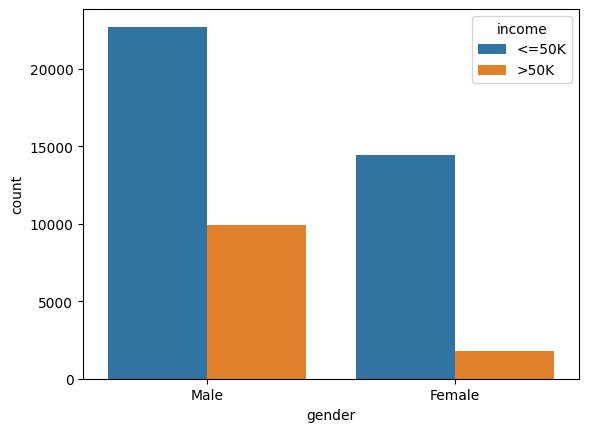

In [21]:
sns.countplot(data=df1, x='gender', hue='income')

- Men have a higher likelihood of earning an income greater than or equal to $50,000 compared to women

In [22]:
df1['hours-per-week_bin'] = pd.cut(df1['hours-per-week'], bins=10)

<ipython-input-23-8e765d93ca62>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


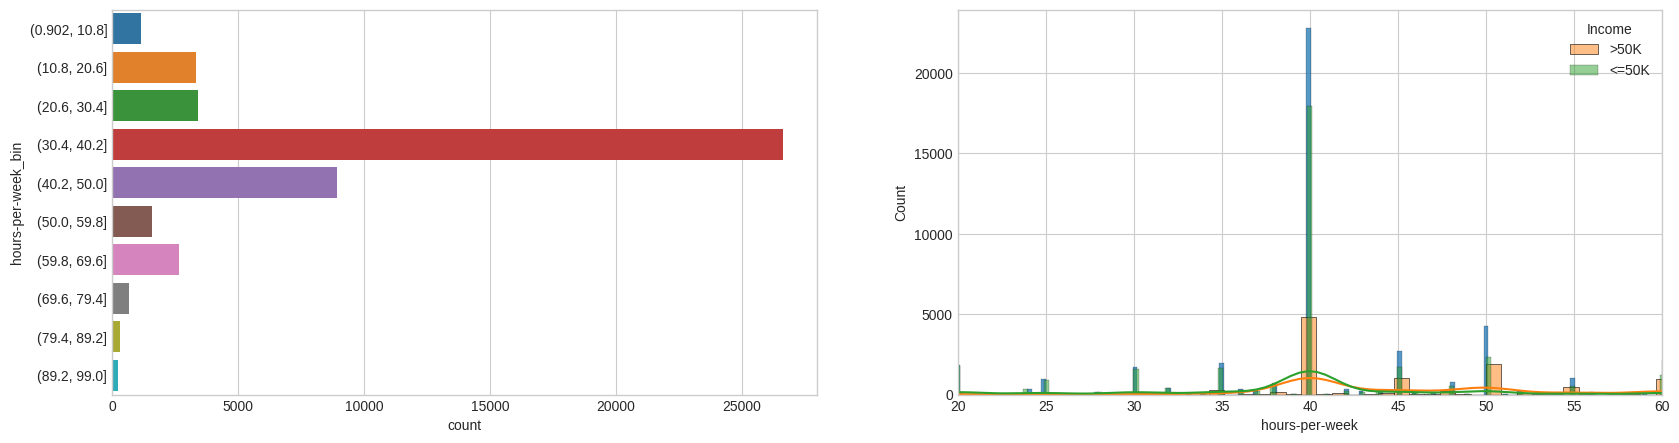

In [23]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(y="hours-per-week_bin", data=df1, ax=axes[0])

sns.histplot(df1['hours-per-week'], ax=axes[1])
sns.histplot(df1[df1['income'] == '>50K']['hours-per-week'], label='>50K', kde=True, ax=axes[1])
sns.histplot(df1[df1['income'] == '<=50K']['hours-per-week'], label='<=50K', kde=True, ax=axes[1])

axes[1].set_ylim(0, None)
axes[1].set_xlim(20, 60)

axes[1].legend(title='Income')

plt.show()

- A clear correlation exists between an individual's hours of work per week and their income category, with a highest income for those how work  between 30 and 40 hours a week.

In [24]:
df1['age_bin'] = pd.cut(df1['age'], 20)

<ipython-input-25-be0750822e2a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


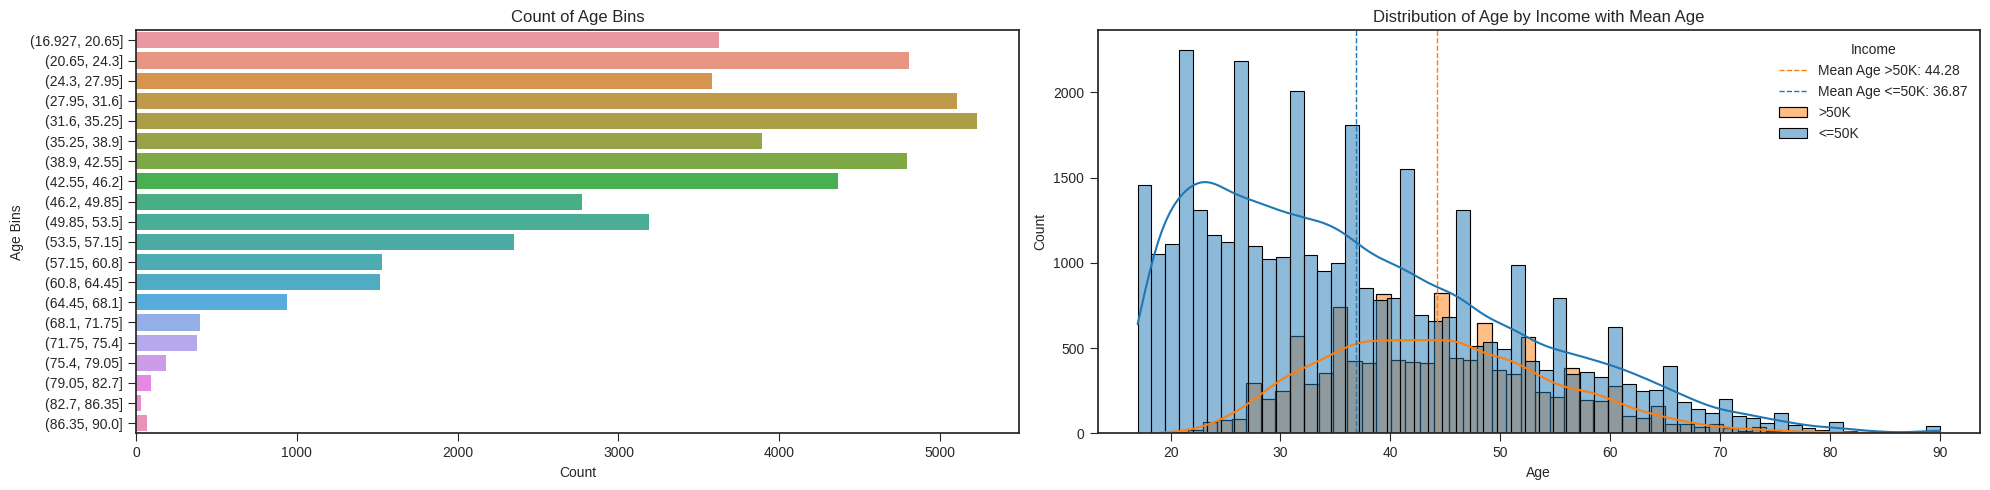

In [25]:
plt.style.use('seaborn-ticks')
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(y="age_bin", data=df1, ax=axes[0])
axes[0].set_title('Count of Age Bins')
axes[0].set_ylabel('Age Bins')
axes[0].set_xlabel('Count')

for income_category, color in zip(['>50K', '<=50K'], ['C1', 'C0']):
    sns.histplot(df1[df1['income'] == income_category]['age'], kde=True, label=income_category, color=color, ax=axes[1])
    mean_age = df1[df1['income'] == income_category]['age'].mean()
    axes[1].axvline(mean_age, color=color, linestyle='--', label=f'Mean Age {income_category}: {mean_age:.2f}', linewidth=1)

axes[1].set_title('Distribution of Age by Income with Mean Age')
axes[1].set_xlabel('Age')
axes[1].legend(title='Income')

plt.tight_layout()
plt.show()

- Certain age categories show a significant skew in income distribution, with some age groups having a highest representation in high income categorie.

In [26]:
encoder = preprocessing.LabelEncoder()

In [27]:
for i in df1.columns :
  if df1[i].dtypes == 'object' :
    df1[i] = encoder.fit_transform(df1[i])

<ipython-input-28-dbdaf6315e61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")


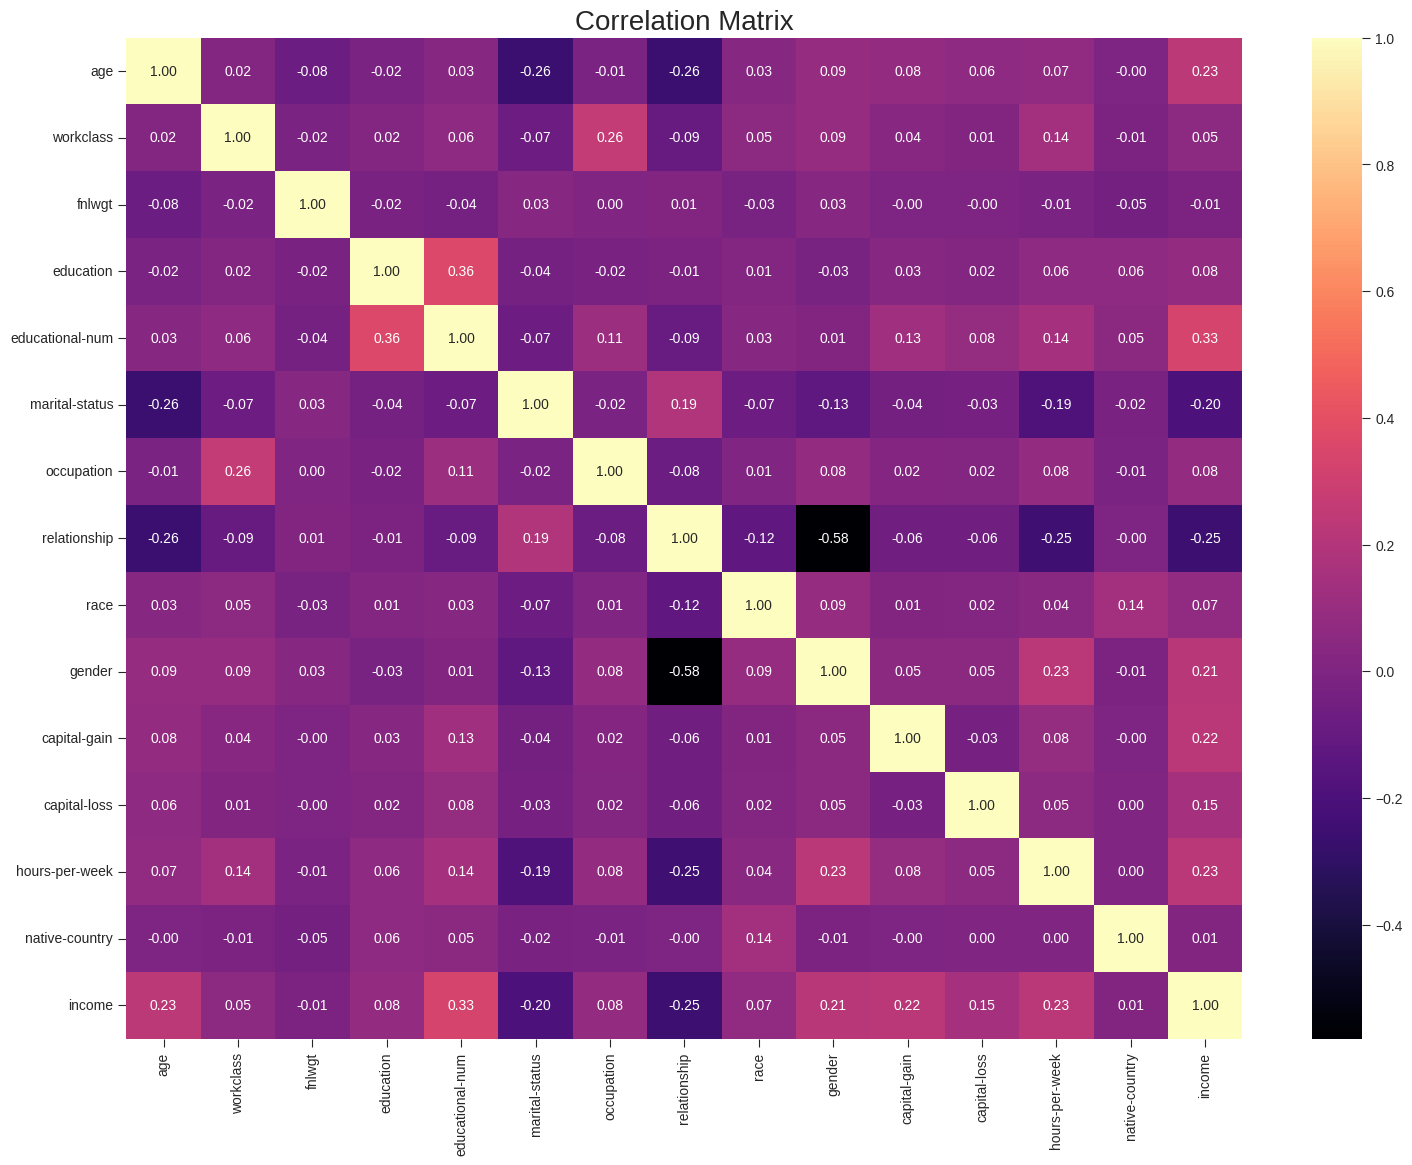

In [28]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Modeling :

- Preprocessing :

In [29]:
X = df.drop(columns= 'income')
y = df['income']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer

In [32]:
num_df = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(StandardScaler())
num_tuple = ('numeric', num_pipe, num_df)

In [33]:
cat_df = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
cat_tuple = ('categorical', cat_pipe, cat_df)

In [34]:
col_transformer = ColumnTransformer([num_tuple, cat_tuple],
                                    verbose_feature_names_out=False)

- Logistic regression :

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression(max_iter=1000)

In [37]:
logreg_pipe = make_pipeline(col_transformer, logreg)

In [38]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [39]:
train_pred_logreg = logreg_pipe.predict(X_train)
test_pred_logreg = logreg_pipe.predict(X_test)

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     25867
        >50K       0.70      0.57      0.63      8621

    accuracy                           0.83     34488
   macro avg       0.78      0.74      0.76     34488
weighted avg       0.82      0.83      0.83     34488



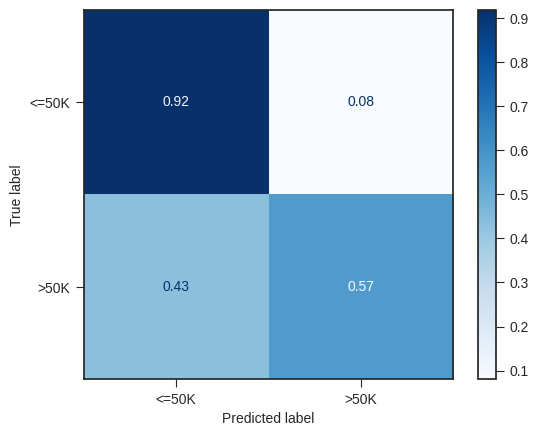

In [40]:
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_train, y_train, cmap='Blues', normalize='true')
print(classification_report(y_train, train_pred_logreg));

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      8702
        >50K       0.68      0.56      0.62      2795

    accuracy                           0.83     11497
   macro avg       0.78      0.74      0.75     11497
weighted avg       0.82      0.83      0.82     11497



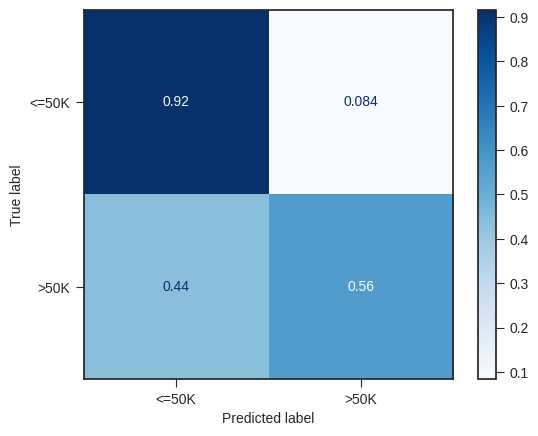

In [41]:
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test, cmap='Blues', normalize='true')
print(classification_report(y_test, test_pred_logreg));

In [42]:
logreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                     verbose_feature_names_out=False)),
  ('logisticregression', LogisticRegression(max_iter=1000))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric',
     

- Tuned Logistic regression model :

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid_lr = {'logisticregression__penalty':['l1', 'l2'],
              'logisticregression__C':[.001, .01, .1, 1, 10, 100, 1000],
              'logisticregression__solver': ['liblinear']}
lr_pipe_grid = GridSearchCV(logreg_pipe, param_grid_lr)

In [45]:
lr_pipe_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']})

In [46]:
best_param = lr_pipe_grid.best_params_
best_param

{'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [47]:
best_param_lr = lr_pipe_grid.best_params_
best_model_lr = lr_pipe_grid.best_estimator_

In [48]:
train_lr_tuned = best_model_lr.predict(X_train)
test_lr_tuned = best_model_lr.predict(X_test)

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      8702
        >50K       0.68      0.56      0.62      2795

    accuracy                           0.83     11497
   macro avg       0.78      0.74      0.75     11497
weighted avg       0.82      0.83      0.82     11497



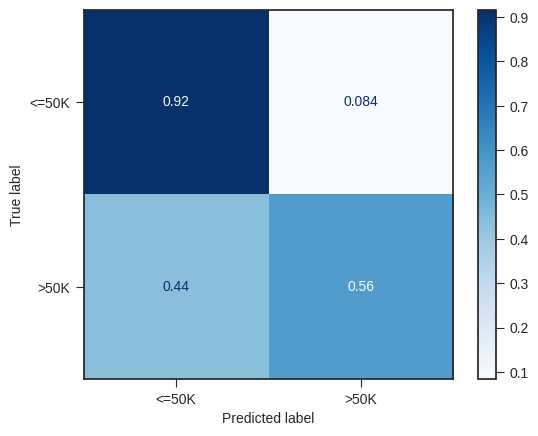

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, test_lr_tuned, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test, test_lr_tuned));

- Random Forest :

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

In [52]:
rf_pipe = make_pipeline(col_transformer, rf)

In [53]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [54]:
train_pred_rf = rf_pipe.predict(X_train)
test_pred_rf = rf_pipe.predict(X_test)

              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     25867
        >50K       1.00      1.00      1.00      8621

    accuracy                           1.00     34488
   macro avg       1.00      1.00      1.00     34488
weighted avg       1.00      1.00      1.00     34488



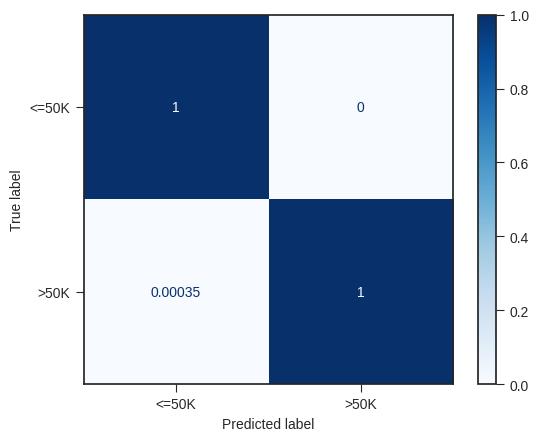

In [55]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_train, y_train, cmap='Blues', normalize='true')
print(classification_report(y_train, train_pred_rf));

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      8702
        >50K       0.64      0.57      0.60      2795

    accuracy                           0.82     11497
   macro avg       0.76      0.73      0.74     11497
weighted avg       0.81      0.82      0.81     11497



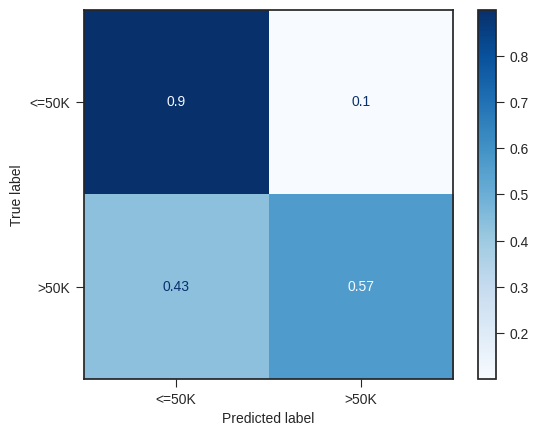

In [56]:
ConfusionMatrixDisplay.from_estimator(rf_pipe, X_test, y_test, cmap='Blues', normalize='true')
print(classification_report(y_test, test_pred_rf));

In [57]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric',
          

- Tuning Random Forest Model :

In [58]:
param_grid_tree = {
    'randomforestclassifier__n_estimators': [10, 50, 100],
    'randomforestclassifier__max_depth': [None, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [2, 4]}

In [59]:
rf_pipe_grid = GridSearchCV(rf_pipe, param_grid_tree, cv=5, scoring='accuracy')

In [60]:
rf_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False)...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 10],
                         'randomforestclassifier__min_samples_leaf': [2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [61]:
best_param_rf = rf_pipe_grid.best_params_
best_param_rf

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 50}

In [62]:
best_param_rf = rf_pipe_grid.best_params_
best_model_rf = rf_pipe_grid.best_estimator_

In [63]:
train_rf_tuned = best_model_rf.predict(X_train)
test_rf_tuned = best_model_rf.predict(X_test)

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      8702
        >50K       0.70      0.56      0.62      2795

    accuracy                           0.84     11497
   macro avg       0.78      0.74      0.76     11497
weighted avg       0.83      0.84      0.83     11497



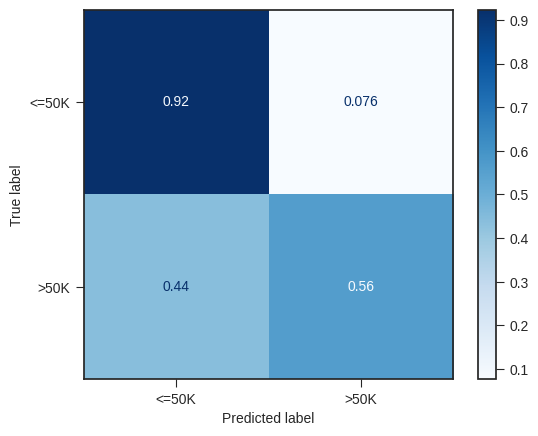

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, test_rf_tuned, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test, test_rf_tuned));

- KNN :

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()

In [67]:
knn_pipe = make_pipeline(col_transformer, knn)

In [68]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [69]:
train_pred_knn = knn_pipe.predict(X_train)
test_pred_knn = knn_pipe.predict(X_test)

              precision    recall  f1-score   support

       <=50K       0.90      0.92      0.91     25867
        >50K       0.75      0.70      0.72      8621

    accuracy                           0.87     34488
   macro avg       0.83      0.81      0.82     34488
weighted avg       0.86      0.87      0.87     34488



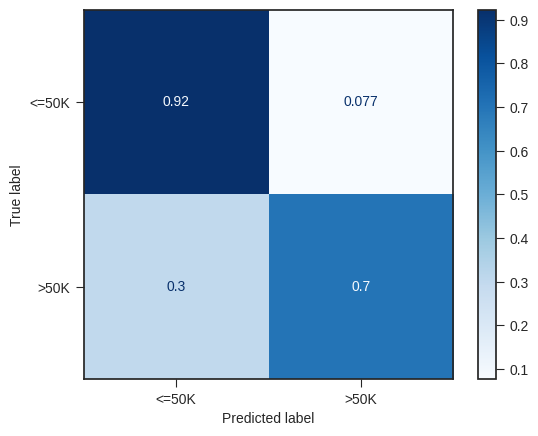

In [70]:
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_train, y_train, cmap='Blues', normalize='true')
print(classification_report(y_train, train_pred_knn));

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      8702
        >50K       0.63      0.60      0.61      2795

    accuracy                           0.82     11497
   macro avg       0.75      0.74      0.75     11497
weighted avg       0.81      0.82      0.82     11497



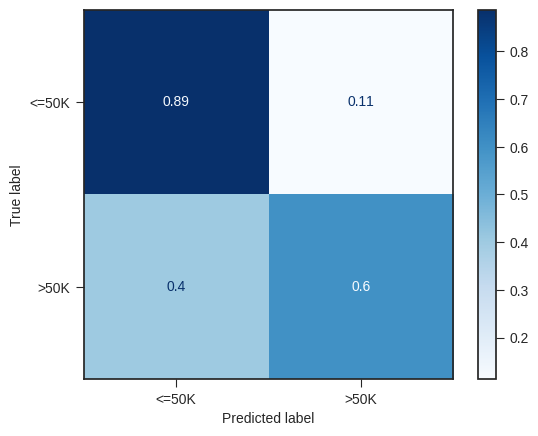

In [71]:
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, cmap='Blues', normalize='true')
print(classification_report(y_test, test_pred_knn))

In [72]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

- Tuned KNN Model :

In [73]:
param_grid_knn = {'kneighborsclassifier__n_neighbors': [5],
              'kneighborsclassifier__p': [1,2],
              'kneighborsclassifier__leaf_size': [3]}

In [74]:
knn_pipe_grid = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring='accuracy')
knn_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d16f0>),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e3b828d1810>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [3],
                         'kneighborsclassifier__n_neighbors': [5],
                         'kneighborsclassifier__p': [1, 2]},
             scoring='accuracy')

In [75]:
knn_pipe_grid.best_params_

{'kneighborsclassifier__leaf_size': 3,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 1}

In [76]:
best_pipe_knn = knn_pipe_grid.best_estimator_

In [77]:
knn_predict_train_tuned = best_pipe_knn.predict(X_train)

In [78]:
knn_predict_test_tuned = best_pipe_knn.predict(X_test)

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      8702
        >50K       0.63      0.60      0.61      2795

    accuracy                           0.82     11497
   macro avg       0.75      0.74      0.75     11497
weighted avg       0.81      0.82      0.82     11497



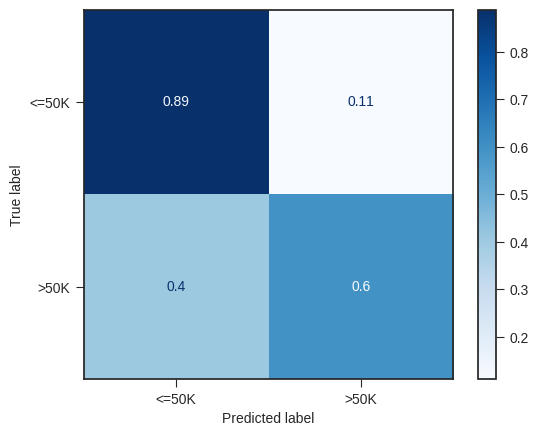

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predict_test_tuned, cmap = 'Blues',normalize = 'true');
print(classification_report(y_test, knn_predict_test_tuned));

# PCA :

In [80]:
scaler = StandardScaler()

In [81]:
pca = PCA()

In [82]:
label_encoder = LabelEncoder()

In [83]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [84]:
df.shape

(45985, 11)

In [85]:
X = df.drop(columns= 'income')
y = df['income']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [87]:
scaled_df = scaler.fit_transform(X)

In [88]:
pca.fit(scaled_df)

PCA()

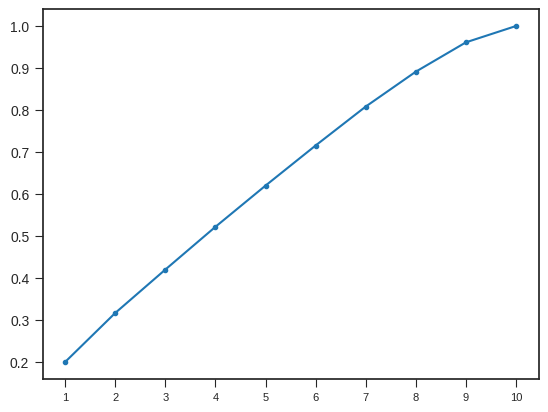

In [89]:
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,11), fontsize=8);

In [119]:
transformer = make_pipeline(StandardScaler(), PCA(0.8))

In [120]:
num_pipe_pca = make_pipeline(transformer)
num_tuple_pca = ('numeric', num_pipe_pca, num_df)

In [121]:
cat_pipe_pca = make_pipeline(transformer, OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
cat_tuple_pca = ('categorical', cat_pipe_pca, cat_df)

In [122]:
col_transformer_pca = ColumnTransformer([num_tuple_pca, cat_tuple_pca],
                                    verbose_feature_names_out=False)

In [123]:
knn_pca_pipe = make_pipeline(col_transformer_pca, best_pipe_knn)
rf_pca_pipe = make_pipeline(col_transformer_pca, best_model_rf)
lr_pca_pipe = make_pipeline(col_transformer_pca, best_model_lr)

In [124]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10)
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Random Forest']
models=[LogisticRegression(C= 1, penalty = 'l1', solver = 'liblinear'),
        KNeighborsClassifier(leaf_size =3, n_neighbors =5, p= 1),
        RandomForestClassifier(min_samples_leaf= 4, min_samples_split =2, n_estimators = 100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    i.fit(X_train, y_train)
    predict_test = i.predict(X_test)
    print(classification_report(y_test, predict_test))
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
models_dataframe

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      8702
           1       0.54      0.21      0.30      2795

    accuracy                           0.76     11497
   macro avg       0.66      0.57      0.58     11497
weighted avg       0.73      0.76      0.72     11497

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      8702
           1       0.40      0.26      0.31      2795

    accuracy                           0.73     11497
   macro avg       0.60      0.57      0.57     11497
weighted avg       0.69      0.73      0.70     11497

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8702
           1       0.69      0.57      0.62      2795

    accuracy                           0.83     11497
   macro avg       0.78      0.74      0.76     11497
weighted avg       0.83      0.83      0.83     11497



,CV Mean,Std
Logistic Regression,0.756964,0.003852
KNN,0.725584,0.004993
Random Forest,0.832902,0.003831
